# Module 3 - Episode 11: Introduction to GeoPandas
Welcome! In this notebook, we’ll explore how to load, manipulate, and visualize geospatial data using `GeoPandas`.

`GeoPandas` extends the `Pandas` library to allow spatial operations—ideal for urban mobility analysis.

In [1]:
!pip install geopandas contextily --quiet 

## Creating a Spatial Dataset from Coordinates

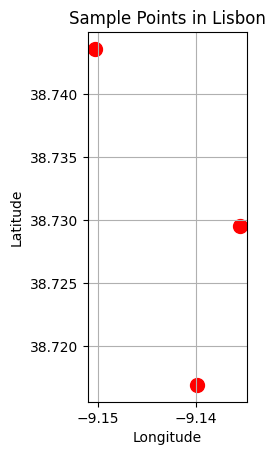

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Coordinates for three points in Lisbon, Portugal
data = {
    "id": [0, 1, 2],
    "latitude": [38.7169, 38.7295, 38.7436],
    "longitude": [-9.1399, -9.1355, -9.1503]
}

# Create GeoDataFrame
df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plot
gdf.plot(markersize=100, color="red")
plt.title("Sample Points in Lisbon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Add OpenStreetMap Background Map with Contextily

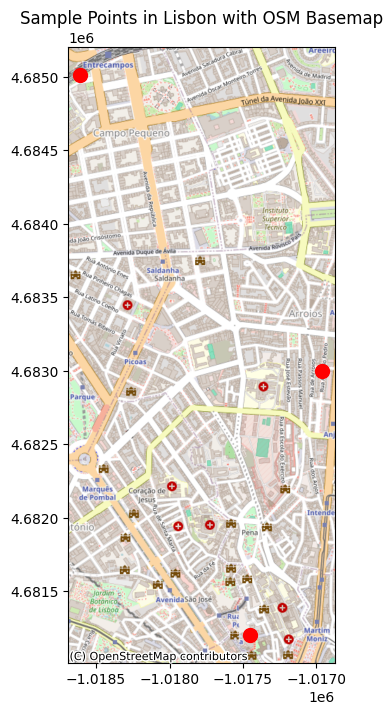

In [4]:
import contextily as ctx

# Reproject and plot with basemap
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(8, 8), color='red', markersize=100)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Sample Points in Lisbon with OSM Basemap")
plt.show()

## Summary
You’ve learned how to load geospatial data using GeoPandas, visualize it, and add contextual basemaps using `Contextily`. These are the foundational skills needed before starting any urban analysis project.

Next, we’ll learn how to extract data from OpenStreetMap and combine it with real city datasets. See you in the next episode!